# Analysis: Variance in util loss

Date: 15.07.2020 Author: Stefan Heidekrüger

## TL:DR

When evaluating the ex-ante ('exa') and maximum ex-interim ('mexi') utility loss in the analytical bne, there is still some aleatoric uncertainty only coming from the different valuations.
For some of our settings, this variance is so high that EVEN THE ANALYTICAL BNE would not be deemed 'static' / 'converged' under our current stopping criterion with current parameters.

Below we consider the two settings of Uniform 10p Risk Averse and the overlapping uniform asymmetric case. In the former, calculating the exa-loss for the true bne yields a mean of 0.0001 with a std of 1.2e-5, which would still fulfill the stopping criterion.

However, in the latter, we get the following:
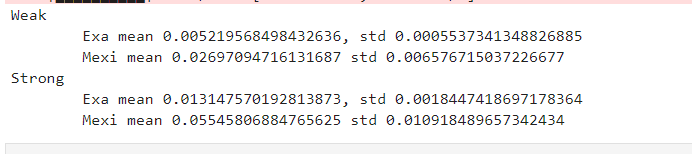

Thus, even the TRUE bne would not fulfill the stopping criterion (neither at 0.0001 nor 0.0005) in this setting.

In [31]:

import os
import sys
root_path = os.path.join(os.path.expanduser('~'), 'bnelearn')
if root_path not in sys.path:
    sys.path.append(root_path)
    
import torch
    
import bnelearn
from bnelearn.experiment.configuration_manager import ConfigurationManager
import bnelearn.util.metrics as metrics
import torch.nn as nn

In [23]:
specific_gpu = 6
torch.cuda.set_device(specific_gpu)


# Uniform Symmetric 10p Risk Averse

In [75]:
payment_rule = 'first_price'
risk = 0.5
n_players = [2,3,5,10]

# Learning
batch_size = 2 ** 18

util_loss_batch_size = 2 ** 12
util_loss_grid_size = 2 ** 13
log_metrics = {'opt': True,#True
               'l2': True,#True
               'util_loss': True}
experiment_type = 'single_item_uniform_symmetric'
log_root_dir = os.path.join(os.path.expanduser('~'), 'bnelearn', 'experiments')
n_players=10

experiment_config, experiment_class = ConfigurationManager(experiment_type=experiment_type) \
    .get_config(log_root_dir=log_root_dir,
                # Run
                n_runs = 10,
                n_epochs = 5000,
                #Setting
                payment_rule=payment_rule,
                risk=risk,
                n_players=n_players,
                core_solver="mpc",
                # Learning
                hidden_nodes = [10,10],
                hidden_activations = [nn.SELU(),nn.SELU()],
                learner_hyperparams = {'population_size': 64,
                                    'sigma': 1.,
                                    'scale_sigma_by_model_size': True},
                optimizer_hyperparams = {'lr': 1e-3},
                optimizer_type='adam',
                pretrain_iters=500,
                batch_size=batch_size,
                model_sharing=False,
                # Hardware
                specific_gpu=specific_gpu,
                # Logging
                util_loss_batch_size=util_loss_batch_size,
                util_loss_grid_size=util_loss_grid_size,
                util_loss_frequency=100,
                log_metrics=log_metrics,
                eval_batch_size=2 ** 22,
                enable_logging=False,
                save_tb_events_to_csv_detailed=False,
                save_tb_events_to_binary_detailed=False)

experiment = experiment_class(experiment_config)

Utility in BNE (sampled): 	0.02187
Utility in BNE (analytic): 	0.02185
Using analytical BNE utility.


In [78]:
exa_losses = []
mexi_losses = []
for i in range(20):
    experiment.bne_env.prepare_iteration()
    agent = experiment.bne_env.agents[0]
    valuation = agent.valuations[:util_loss_batch_size, ...]
    grid = agent.get_valuation_grid(util_loss_grid_size, True)
    eq_bid_profile = torch.empty(util_loss_batch_size, experiment.n_players, agent.n_items)
    for a in experiment.bne_env.agents:
        eq_bid_profile[:, a.player_position, :] = a.get_action()[:util_loss_batch_size, ...]
    ex_i_loss, _ = metrics.ex_interim_util_loss(
        experiment.mechanism,eq_bid_profile, agent, valuation, grid)
    exa_losses.append(ex_i_loss.mean().item())
    mexi_losses.append(ex_i_loss.max().item())
uniform_sym_risk_10_exa = torch.tensor(exa_losses)
uniform_sym_risk_10_mexi = torch.tensor(mexi_losses)

  2%|▏         | 91/4096 [00:00<00:04, 905.22it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.52 GiB free; 3.53 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.84it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.69it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.47it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.71it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.53it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.28it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.76it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.65it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.54it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.82it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.60it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.80it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.92it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.69it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.87it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.62it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.74it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.65it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


  2%|▏         | 91/4096 [00:00<00:04, 905.70it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 2.69 GiB already allocated; 6.58 GiB free; 3.47 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:31<00:00, 128.08it/s]


In [126]:
uniform_sym_risk_10_exa.mean().item(), uniform_sym_risk_10_exa.std().item()


(0.00013635214418172836, 1.2634153790713754e-05)

In [87]:
uniform_sym_risk_10_mexi.mean(), uniform_sym_risk_10_mexi.std()

(tensor(0.0016), tensor(0.0003))

In [119]:
uniform_sym_risk_10_exa

tensor([0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001,
        0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
        0.0001, 0.0001])

In [120]:
[uniform_sym_risk_10_exa[i-3:i].max()  - uniform_sym_risk_10_exa[i-3:i].min() for i in range(3,20)]    

[tensor(1.6247e-05),
 tensor(2.0427e-05),
 tensor(1.2083e-05),
 tensor(3.1553e-05),
 tensor(3.3557e-05),
 tensor(3.3557e-05),
 tensor(9.2325e-06),
 tensor(4.8988e-05),
 tensor(4.8988e-05),
 tensor(4.4220e-05),
 tensor(1.9130e-05),
 tensor(1.9130e-05),
 tensor(8.5223e-06),
 tensor(7.9643e-06),
 tensor(6.9772e-06),
 tensor(6.9772e-06),
 tensor(4.8845e-06)]

# asymm overlapping

In [90]:
experiment_type = 'single_item_asymmetric_uniform_overlapping'
payment_rule = 'first_price'
risk = 1.0
n_players=2

# Learning
batch_size = 2 ** 18

util_loss_batch_size = 2 ** 12
util_loss_grid_size = 2 ** 13
log_metrics = {'opt': True,#True
               'l2': True,#True
               'util_loss': True}

log_root_dir = os.path.join(os.path.expanduser('~'), 'bnelearn', 'experiments')


experiment_config, experiment_class = ConfigurationManager(experiment_type=experiment_type) \
    .get_config(log_root_dir=log_root_dir,
                # Run
                n_runs = 10,
                n_epochs = 5000,
                #Setting
                payment_rule=payment_rule,
                risk=risk,
                n_players=n_players,
                core_solver="mpc",
                # Learning
                hidden_nodes = [10,10],
                hidden_activations = [nn.SELU(),nn.SELU()],
                learner_hyperparams = {'population_size': 64,
                                    'sigma': 1.,
                                    'scale_sigma_by_model_size': True},
                optimizer_hyperparams = {'lr': 1e-3},
                optimizer_type='adam',
                pretrain_iters=500,
                batch_size=batch_size,
                model_sharing=False,
                # Hardware
                specific_gpu=specific_gpu,
                # Logging
                util_loss_batch_size=util_loss_batch_size,
                util_loss_grid_size=util_loss_grid_size,
                util_loss_frequency=100,
                log_metrics=log_metrics,
                eval_batch_size=2 ** 22,
                enable_logging=False,
                save_tb_events_to_csv_detailed=False,
                save_tb_events_to_binary_detailed=False)

experiment = experiment_class(experiment_config)

Utilities in BNE1 (sampled):	0.97034	5.06985.
No closed form solution for BNE utilities available in this setting. Using sampled value as baseline.
Debug: eval_batch size:4194304
	Replacing sampled bne utilities by precalculated utilities with higher precision: tensor([0.9694, 5.0688])


In [106]:
exa_losses_weak = []
mexi_losses_weak = []
exa_losses_strong = []
mexi_losses_strong = []
for i in range(20):
    print(i)
    experiment.bne_env[0].prepare_iteration()
    # weak
    agent = experiment.bne_env[0].agents[0]
    valuation = agent.valuations[:util_loss_batch_size, ...]
    grid = agent.get_valuation_grid(util_loss_grid_size, True)
    eq_bid_profile = torch.empty(util_loss_batch_size, experiment.n_players, agent.n_items)
    for a in experiment.bne_env[0].agents:
        eq_bid_profile[:, a.player_position, :] = a.get_action()[:util_loss_batch_size, ...]
    ex_i_loss, _ = metrics.ex_interim_util_loss(
        experiment.mechanism,eq_bid_profile, agent, valuation, grid)
    exa_losses_weak.append(ex_i_loss.mean().item())
    mexi_losses_weak.append(ex_i_loss.max().item())
    # strong
    agent = experiment.bne_env[0].agents[1]
    valuation = agent.valuations[:util_loss_batch_size, ...]
    grid = agent.get_valuation_grid(util_loss_grid_size, True)
    eq_bid_profile = torch.empty(util_loss_batch_size, experiment.n_players, agent.n_items)
    for a in experiment.bne_env[0].agents:
        eq_bid_profile[:, a.player_position, :] = a.get_action()[:util_loss_batch_size, ...]
    ex_i_loss, _ = metrics.ex_interim_util_loss(
        experiment.mechanism,eq_bid_profile, agent, valuation, grid)
    exa_losses_strong.append(ex_i_loss.mean().item())
    mexi_losses_strong.append(ex_i_loss.max().item())
uniform_asym_overlap_exa_weak = torch.tensor(exa_losses_weak)
uniform_asym_overlap_mexi_weak = torch.tensor(mexi_losses_weak)
uniform_asym_overlap_exa_strong = torch.tensor(exa_losses_strong)
uniform_asym_overlap_mexi_strong = torch.tensor(mexi_losses_strong)
print(f"Weak\n \tExa mean {uniform_asym_overlap_exa_weak.mean().item()}, std {uniform_asym_overlap_exa_weak.std().item()}\n \tMexi mean { uniform_asym_overlap_mexi_weak.mean().item()} std {    uniform_asym_overlap_mexi_weak.std().item()}")
print(f"Strong\n \tExa mean {    uniform_asym_overlap_exa_strong.mean().item()}, std {    uniform_asym_overlap_exa_strong.std().item()}\n \tMexi mean {    uniform_asym_overlap_mexi_strong.mean().item()} std {    uniform_asym_overlap_mexi_strong.std().item()}")

0


  4%|▍         | 182/4096 [00:00<00:02, 1778.18it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1826.66it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 391.60it/s]


1


  4%|▍         | 184/4096 [00:00<00:02, 1821.42it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1825.33it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 391.21it/s]


2


  4%|▍         | 184/4096 [00:00<00:02, 1821.44it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1823.00it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.85it/s]


3


  4%|▍         | 184/4096 [00:00<00:02, 1824.27it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1822.94it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.85it/s]


4


  4%|▍         | 184/4096 [00:00<00:02, 1823.08it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.54it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.70it/s]


5


  4%|▍         | 184/4096 [00:00<00:02, 1823.58it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1822.30it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.69it/s]


6


  4%|▍         | 184/4096 [00:00<00:02, 1822.99it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.96it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.70it/s]


7


  4%|▍         | 184/4096 [00:00<00:02, 1817.76it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.57it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


8


  4%|▍         | 184/4096 [00:00<00:02, 1821.39it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1819.40it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


9


  4%|▍         | 184/4096 [00:00<00:02, 1818.69it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.68it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


10


  4%|▍         | 184/4096 [00:00<00:02, 1822.92it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1820.37it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


11


  4%|▍         | 184/4096 [00:00<00:02, 1822.96it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1819.96it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


12


  4%|▍         | 184/4096 [00:00<00:02, 1823.20it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1819.24it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.52it/s]


13


  4%|▍         | 184/4096 [00:00<00:02, 1822.85it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1820.93it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


14


  4%|▍         | 184/4096 [00:00<00:02, 1822.06it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.65it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


15


  4%|▍         | 184/4096 [00:00<00:02, 1821.63it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.46it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


16


  4%|▍         | 184/4096 [00:00<00:02, 1822.66it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.82it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.53it/s]


17


  4%|▍         | 184/4096 [00:00<00:02, 1816.14it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.55it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


18


  4%|▍         | 184/4096 [00:00<00:02, 1822.85it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1820.88it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


19


  4%|▍         | 184/4096 [00:00<00:02, 1823.15it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


  4%|▍         | 184/4096 [00:00<00:02, 1821.50it/s]

Failed computing util_loss as batch. Trying sequential valuations computation. Decrease dimensions to fix. Error:
 CUDA out of memory. Tried to allocate 512.00 GiB (GPU 6; 10.76 GiB total capacity; 1.47 GiB already allocated; 8.11 GiB free; 1.94 GiB reserved in total by PyTorch)


100%|██████████| 4096/4096 [00:10<00:00, 390.54it/s]


Weak
 	Exa mean 0.005219568498432636, std 0.0005537341348826885
 	Mexi mean 0.02697094716131687 std 0.006576715037226677
Strong
 	Exa mean 0.013147570192813873, std 0.0018447418697178364
 	Mexi mean 0.05545806884765625 std 0.010918489657342434


In [121]:
uniform_asym_overlap_exa

tensor([0.0070, 0.0048, 0.0053, 0.0061, 0.0058, 0.0053, 0.0042, 0.0043, 0.0053,
        0.0063, 0.0048, 0.0048, 0.0045, 0.0048, 0.0064, 0.0050, 0.0069, 0.0055,
        0.0045, 0.0050])

In [124]:
[uniform_asym_overlap_exa_weak[i-3:i].max()  - uniform_asym_overlap_exa_weak[i-3:i].min() for i in range(3,20)]    

[tensor(0.0008),
 tensor(0.0006),
 tensor(0.0010),
 tensor(0.0008),
 tensor(0.0015),
 tensor(0.0007),
 tensor(0.0014),
 tensor(0.0014),
 tensor(0.0012),
 tensor(0.0005),
 tensor(0.0002),
 tensor(9.1984e-05),
 tensor(0.0002),
 tensor(0.0010),
 tensor(0.0009),
 tensor(0.0011),
 tensor(0.0011)]

In [125]:
[uniform_asym_overlap_exa_strong[i-3:i].max()  - uniform_asym_overlap_exa_strong[i-3:i].min() for i in range(3,20)]   

[tensor(0.0046),
 tensor(0.0046),
 tensor(0.0008),
 tensor(0.0030),
 tensor(0.0036),
 tensor(0.0015),
 tensor(0.0041),
 tensor(0.0034),
 tensor(0.0041),
 tensor(0.0041),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0029),
 tensor(0.0005),
 tensor(0.0031),
 tensor(0.0031),
 tensor(0.0035)]